In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/CORD-19-research-challenge/COVID.DATA.LIC.AGMT.pdf
/kaggle/input/CORD-19-research-challenge/metadata.readme
/kaggle/input/CORD-19-research-challenge/json_schema.txt
/kaggle/input/CORD-19-research-challenge/metadata.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/What is the incubation period of the virus_.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Incubation period across different age groups.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Proportion of pediatric COVID19 patients who were asymptomatic.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Manifestations of COVID-19 including but not limited to possible cardiomyopathy and cardiac arrest.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/How does viral load relate to disease presentations and likelihood of a po

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = '/kaggle/input/CORD-19-research-challenge/metadata.csv'
df = pd.read_csv(file_path, low_memory=False)

In [17]:
df.head().T

,0,1,2,3,4
cord_uid,ug7v899j,02tnwd4m,ejv2xln0,2b73a28n,9785vg6d
sha,d1aafb70c066a2068b02786f8929fd9c900897fb,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,06ced00a5fc04215949aa72528f2eeaae1d58927,348055649b6b8cf2b9a376498df9bf41f7123605,5f48792a5fa08bed9f56016f4981ae2ca6031b32
source_x,PMC,PMC,PMC,PMC,PMC
title,Clinical features of culture-proven Mycoplasma...,Nitric oxide: a pro-inflammatory mediator in l...,Surfactant protein-D and pulmonary host defense,Role of endothelin-1 in lung disease,Gene expression in epithelial cells in respons...
doi,10.1186/1471-2334-1-6,10.1186/rr14,10.1186/rr19,10.1186/rr44,10.1186/rr61
pmcid,PMC35282,PMC59543,PMC59549,PMC59574,PMC59580
pubmed_id,11472636,11667967,11667972,11686871,11686888
license,no-cc,no-cc,no-cc,no-cc,no-cc
abstract,OBJECTIVE: This retrospective chart review des...,Inflammatory diseases of the respiratory tract...,Surfactant protein-D (SP-D) participates in th...,Endothelin-1 (ET-1) is a 21 amino acid peptide...,Respiratory syncytial virus (RSV) and pneumoni...
publish_time,2001-07-04,2000-08-15,2000-08-25,2001-02-22,2001-05-11


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [12]:
df.shape

(1056660, 19)

In [13]:
df.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

In [18]:
df_info = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Value Count": df.isnull().sum().values,
    "Missing Value Ratio (%)": np.round(df.isnull().mean().values * 100, 2),
    "Filled Value Count": df.notnull().sum().values
})

df_info = df_info.sort_values("Missing Value Count", ascending=False).reset_index(drop=True)

df_info

,Column Name,Data Type,Missing Value Count,Missing Value Ratio (%),Filled Value Count
0,mag_id,float64,1056660,100.00,0
1,arxiv_id,object,1042411,98.65,14249
2,pmc_json_files,object,740918,70.12,315742
3,pdf_json_files,object,682894,64.63,373766
4,sha,object,682894,64.63,373766
5,pmcid,object,667089,63.13,389571
6,who_covidence_id,object,573725,54.30,482935
7,pubmed_id,object,557728,52.78,498932
8,doi,object,399880,37.84,656780
9,url,object,369726,34.99,686934


In [19]:
selected_columns = ['cord_uid', 'title', 'abstract', 'publish_time', 'authors', 'journal', 'source_x']
df_subset = df[selected_columns].copy()

In [20]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   cord_uid      1056660 non-null  object
 1   title         1056157 non-null  object
 2   abstract      821116 non-null   object
 3   publish_time  1054846 non-null  object
 4   authors       1032791 non-null  object
 5   journal       969338 non-null   object
 6   source_x      1056660 non-null  object
dtypes: object(7)
memory usage: 56.4+ MB


In [21]:
df_info = pd.DataFrame({
    "Column Name": df_subset.columns,
    "Data Type": df_subset.dtypes.values,
    "Missing Value Count": df_subset.isnull().sum().values,
    "Missing Value Ratio (%)": np.round(df_subset.isnull().mean().values * 100, 2),
    "Filled Value Count": df_subset.notnull().sum().values
})

df_info = df_info.sort_values("Missing Value Count", ascending=False).reset_index(drop=True)

df_info

,Column Name,Data Type,Missing Value Count,Missing Value Ratio (%),Filled Value Count
0,abstract,object,235544,22.29,821116
1,journal,object,87322,8.26,969338
2,authors,object,23869,2.26,1032791
3,publish_time,object,1814,0.17,1054846
4,title,object,503,0.05,1056157
5,cord_uid,object,0,0.00,1056660
6,source_x,object,0,0.00,1056660


In [24]:
df_subset.head().T

,0,1,2,3,4
cord_uid,ug7v899j,02tnwd4m,ejv2xln0,2b73a28n,9785vg6d
title,Clinical features of culture-proven Mycoplasma...,Nitric oxide: a pro-inflammatory mediator in l...,Surfactant protein-D and pulmonary host defense,Role of endothelin-1 in lung disease,Gene expression in epithelial cells in respons...
abstract,OBJECTIVE: This retrospective chart review des...,Inflammatory diseases of the respiratory tract...,Surfactant protein-D (SP-D) participates in th...,Endothelin-1 (ET-1) is a 21 amino acid peptide...,Respiratory syncytial virus (RSV) and pneumoni...
publish_time,2001-07-04,2000-08-15,2000-08-25,2001-02-22,2001-05-11
authors,"Madani, Tariq A; Al-Ghamdi, Aisha A","Vliet, Albert van der; Eiserich, Jason P; Cros...","Crouch, Erika C","Fagan, Karen A; McMurtry, Ivan F; Rodman, David M","Domachowske, Joseph B; Bonville, Cynthia A; Ro..."
journal,BMC Infect Dis,Respir Res,Respir Res,Respir Res,Respir Res
source_x,PMC,PMC,PMC,PMC,PMC


In [25]:
df_subset['publish_time'] = pd.to_datetime(df_subset['publish_time'], errors='coerce')
df_subset.dropna(subset=['publish_time'], inplace=True)
df_subset['publish_year'] = df_subset['publish_time'].dt.year
df_subset['publish_month_year'] = df_subset['publish_time'].dt.to_period('M')

In [48]:
# Filter data to include only articles from late 2019 onwards, focusing on the COVID-19 era
# You can adjust the start date as needed, e.g., '2020-01-01' for a strict COVID-19 focus.
covid_era_start_date = '2019-12-01'
df_subset = df_subset[df_subset['publish_time'] >= covid_era_start_date].copy()

In [49]:
# prevent the error by turning the missing values in the 'Authors' column into string
df_subset['authors_str'] = df_subset['authors'].astype(str)

# Function calculating the number of authors
def count_authors(author_list_str):
    if author_list_str == 'nan': 
        return 0
    # Separate with comma and handle empty stars
    authors = [a.strip() for a in author_list_str.split(',') if a.strip()]
    return len(authors)

df_subset['num_authors'] = df_subset['authors_str'].apply(count_authors)

In [50]:
df_subset[['authors', 'num_authors']].head().T

,4151,4160,4174,4177,4179
authors,"Lawson, J.S.; Syme, H.M.; Wheeler-Jones, C.P.D...","Stoian, Ana M.M.; Zimmerman, Jeff; Ji, Ju; Hef...","Wein, Alexander N.; McMaster, Sean R.; Takamur...","Herrera-Diestra, José L.; Meyers, Lauren Ancel","Soto-Quintero, Albanelly; Guarrotxena, Nekane;..."
num_authors,5,9,15,3,5


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


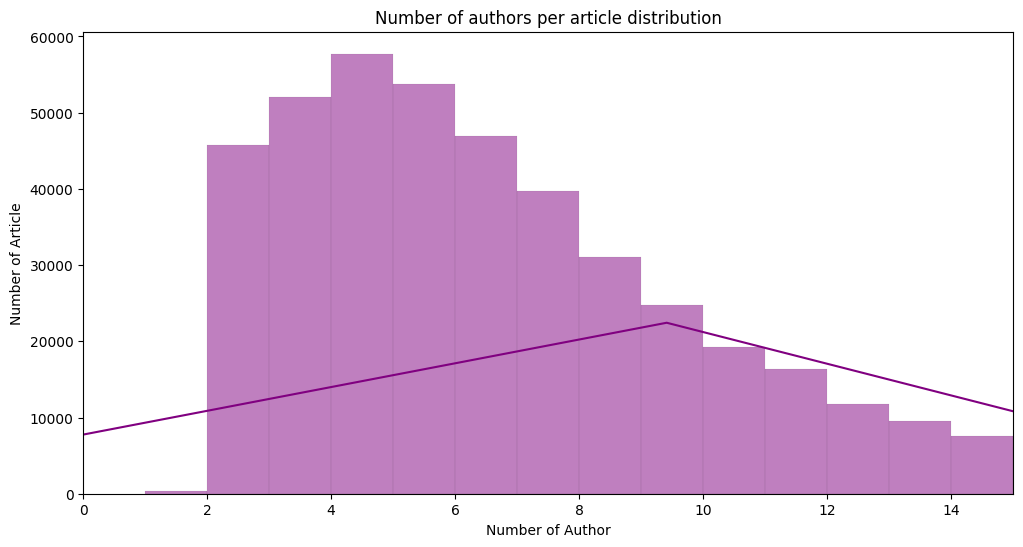

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(df_subset['num_authors'], bins=range(1, df_subset['num_authors'].max() + 2), kde=True, color='purple')
plt.title('Number of authors per article distribution')
plt.xlabel('Number of Author')
plt.ylabel('Number of Article')
plt.xlim(0, 15) 
plt.show()

In [52]:
# Fill missing journals 
df_subset['journal_clean'] = df_subset['journal'].fillna('Unknown Journal')

In [53]:
top_journals = df_subset['journal_clean'].value_counts().head(15)
print("Journals with the most publications:\n", top_journals)

Journals with the most publications:
 journal_clean
Unknown Journal                    36243
bioRxiv                             8579
Int J Environ Res Public Health     8137
PLoS One                            5524
Reactions Weekly                    3698
Sci Rep                             3590
Front Psychol                       3263
BMJ                                 2992
Cureus                              2953
BMJ Open                            2513
Front Immunol                       2463
Front Public Health                 2407
Int J Mol Sci                       2185
Viruses                             2020
J Clin Med                          1929
Name: count, dtype: int64


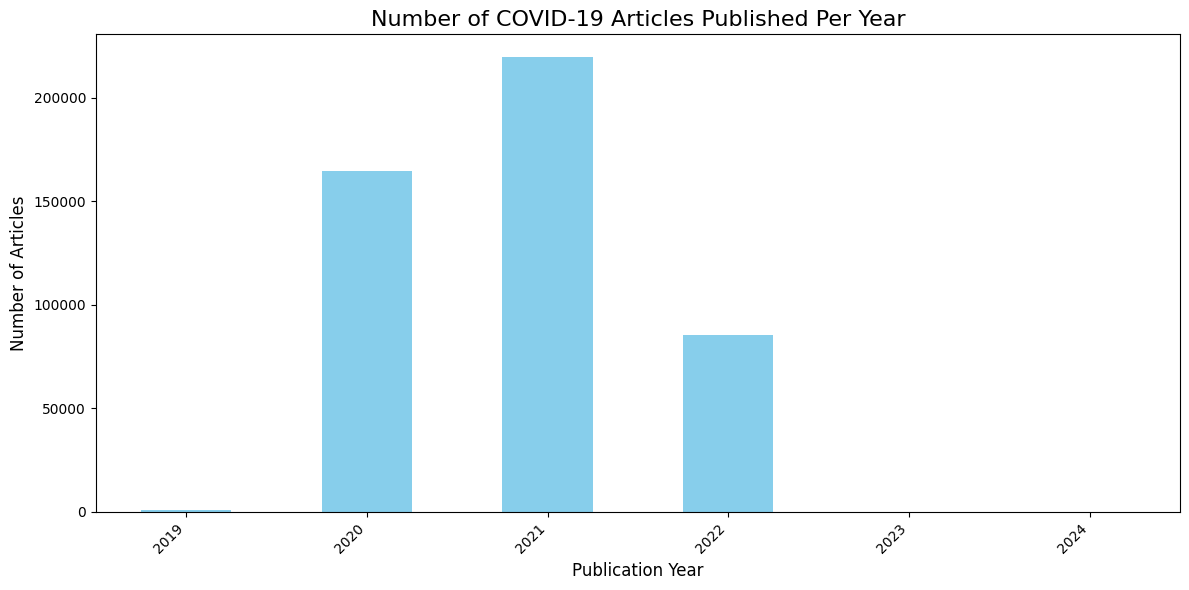

In [62]:
plt.figure(figsize=(12, 6))
df_subset['publish_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of COVID-19 Articles Published Per Year', fontsize=16)
plt.xlabel('Publication Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

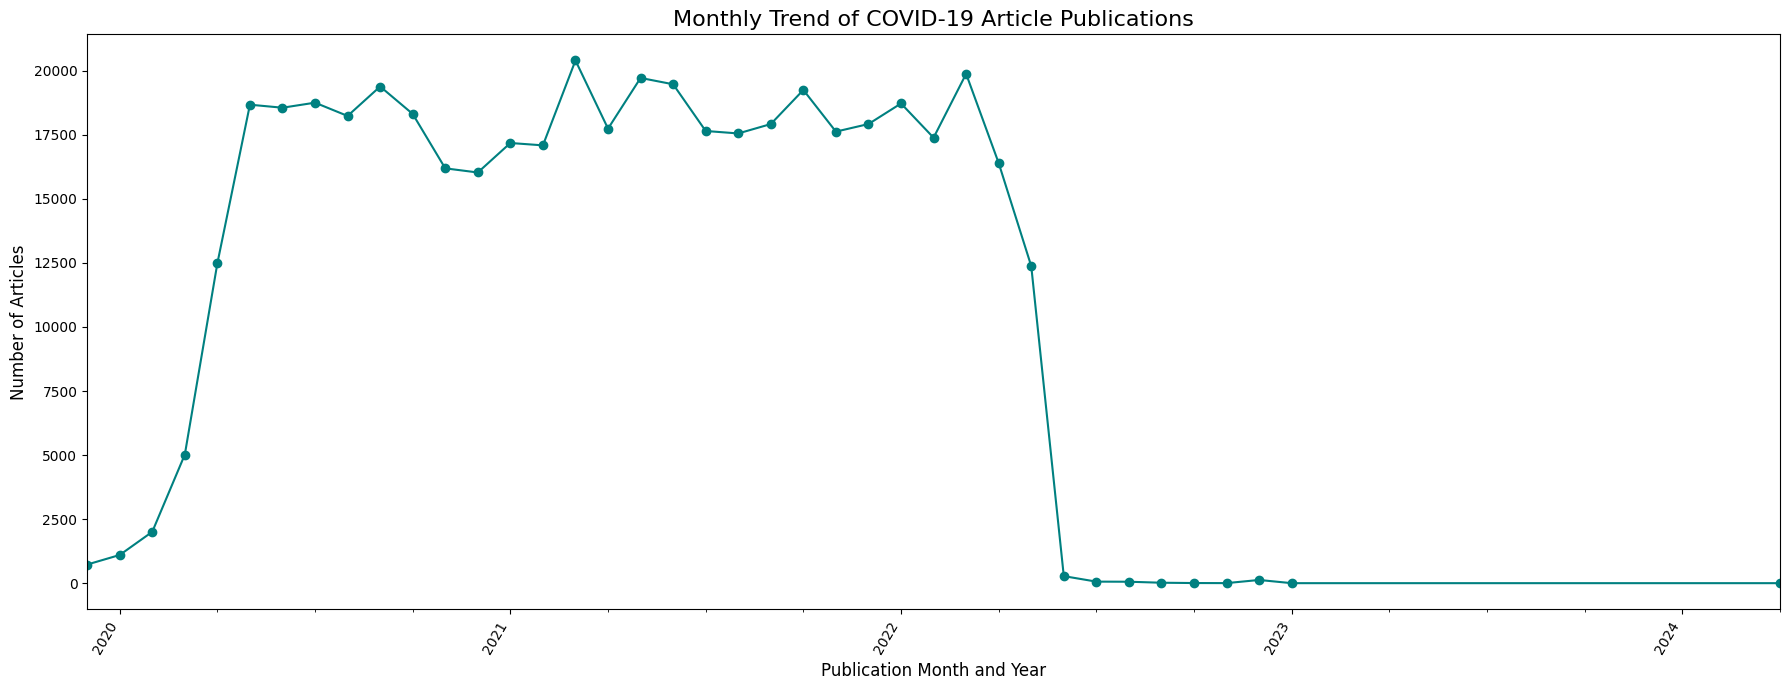

In [63]:
plt.figure(figsize=(18, 7))
# Convert 'publish_month_year' to string for proper plotting if not already in correct order
df_subset['publish_month_year'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='teal')
plt.title('Monthly Trend of COVID-19 Article Publications', fontsize=16)
plt.xlabel('Publication Month and Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10) # Adjust rotation and font size for monthly labels
plt.tight_layout()
plt.show()

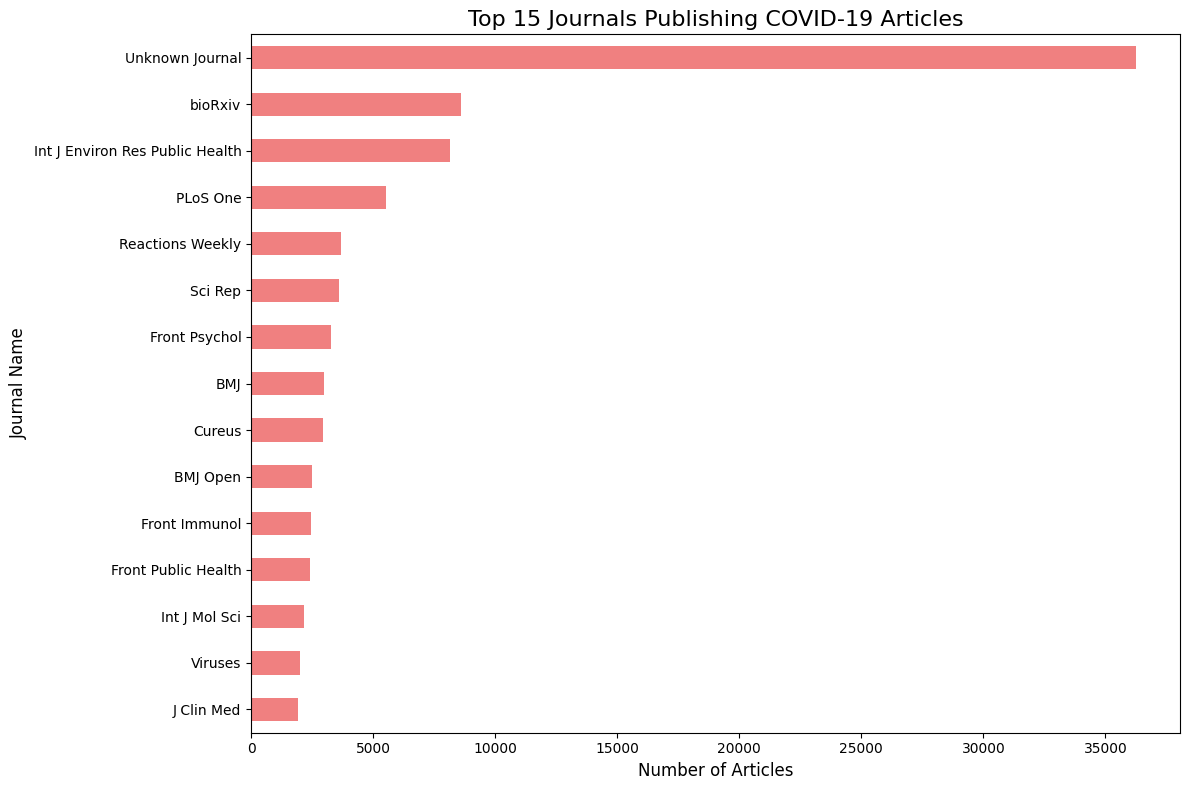

In [64]:
plt.figure(figsize=(12, 8))
df_subset['journal_clean'].value_counts().head(15).plot(kind='barh', color='lightcoral')
plt.title('Top 15 Journals Publishing COVID-19 Articles', fontsize=16)
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('Journal Name', fontsize=12)
plt.gca().invert_yaxis() # Display the highest count at the top
plt.tight_layout()
plt.show()

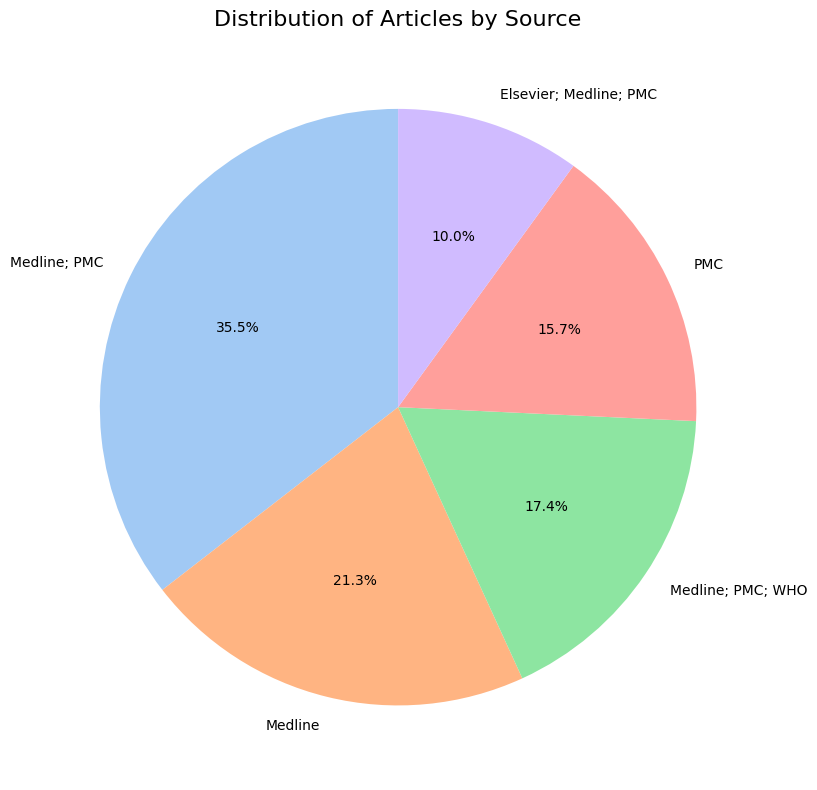

In [57]:
plt.figure(figsize=(10, 8))
df_subset['source_x'].value_counts().head().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Articles by Source', fontsize=16)
plt.ylabel('') # Hide the default y-label for pie charts
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


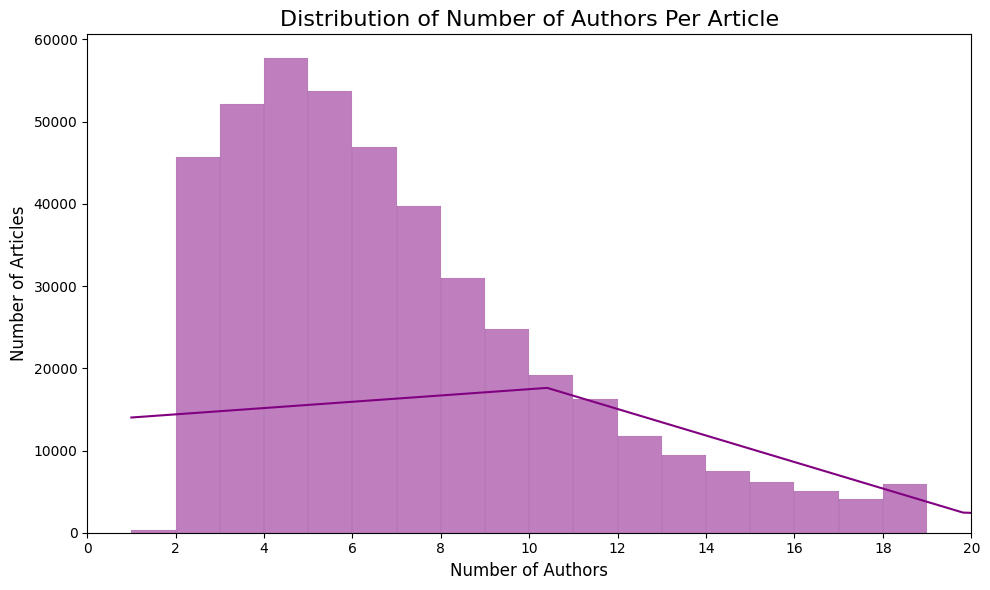

In [65]:
plt.figure(figsize=(10, 6))
# Filter out articles with 0 authors if they are significant in count
# For better visualization, limit x-axis to a reasonable range if there are extreme outliers
sns.histplot(df_subset['num_authors'][df_subset['num_authors'] > 0], bins=range(1, 20), kde=True, color='purple')
plt.title('Distribution of Number of Authors Per Article', fontsize=16)
plt.xlabel('Number of Authors', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xlim(0, 20) # Focusing on the most common range, adjust as needed
plt.xticks(range(0, 21, 2)) # Show ticks at every 2 authors
plt.tight_layout()
plt.show()

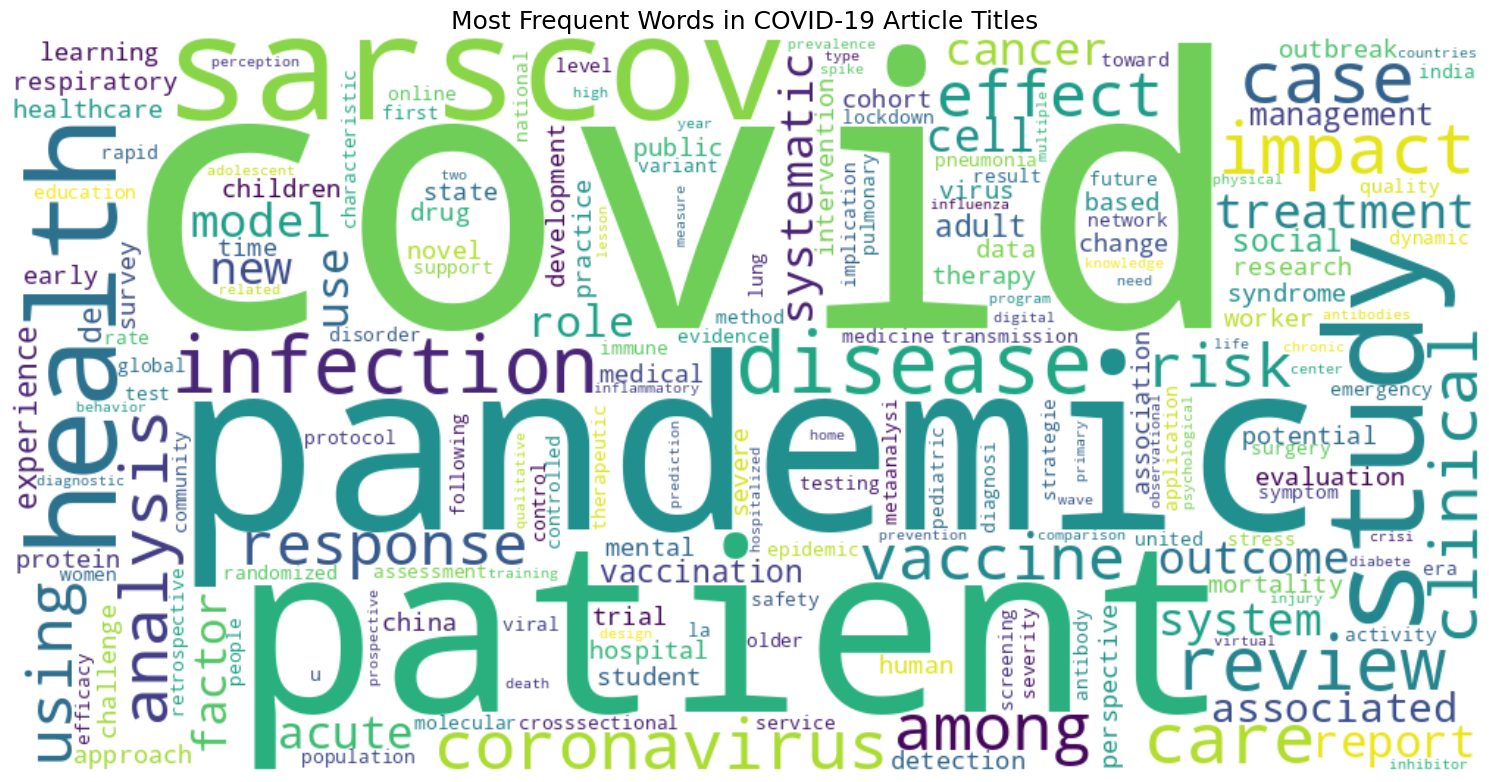

In [59]:
from wordcloud import WordCloud
import re # For simple text cleaning if needed

# Combine all titles into a single string
# Ensure to handle potential NaN values in 'title'
all_titles = ' '.join(df_subset['title'].dropna().astype(str))

# Basic cleaning for word cloud (optional, can be more extensive)
# Remove non-alphabetic characters and convert to lower case
all_titles = re.sub(r'[^a-zA-Z\s]', '', all_titles).lower()

# You might want to remove common English stopwords from the word cloud as well
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# all_titles_cleaned = ' '.join([word for word in all_titles.split() if word not in stop_words])

wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      collocations=False, # Set to False to avoid common bigrams if single words are preferred
                      min_font_size=10).generate(all_titles) # Use all_titles_cleaned if stopwords removed

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide axes
plt.title('Most Frequent Words in COVID-19 Article Titles', fontsize=18)
plt.tight_layout()
plt.show()